<h1 style="text-align: center; color: navy;"> ACCREDIAN </h1> 
<h3 style="color: orange"> &gt;&gt; &nbsp; IMPORTING PACKAGES </h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<h3 style="color: orange"> &gt;&gt; &nbsp; LOADING DATASET </h3>

In [2]:
df=pd.read_csv('Fraud.csv')

<h3 style="color: orange"> &gt;&gt; &nbsp; ANALYSING DATA </h3>

In [3]:
#getting data dimensions
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#checking for missing data
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
metric=["step","type","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud","isFlaggedFraud"]

<AxesSubplot:>

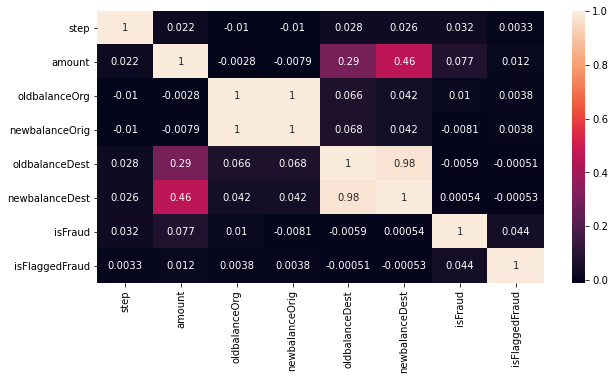

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df[metric].corr(),annot=True)

<p>From the matrix, it's advent that no two parameters are strongly correlated except for 'isFraud' and 'isFlaggedFraud'</p>

In [8]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<B>CASH-IN</B> is the process of increasing the balance ofaccount by paying in cash to a merchant.

<B>CASH-OUT</B> is the opposite process of CASH-IN, itmeans to withdraw cash from a merchant which decreasesthe balance of the account.

<B>DEBIT</B> is similar process than CASH-OUT and in-volves sending the money from the mobile money serviceto a bank account.

<B>PAYMENT</B> is the process of paying for goods or ser-vices to merchants which decreases the balance of the ac-count and increases the balance of the receiver.

<B>TRANSFER</B> is the process of sending money to an-other user of the service through the mobile money plat-form.

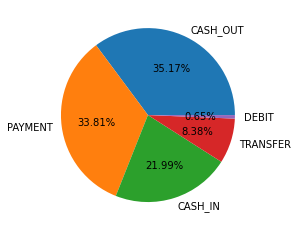

In [9]:
plt.pie(df['type'].value_counts(),labels=df['type'].value_counts().keys(),autopct='%.2f%%');

<h3 style="color: orange"> &gt;&gt; &nbsp; DATA PRE-PROCESSING </h3>
<p>
    Outliers that lie in 0.025 and 0.975 quantiles are removed.
</p>

In [10]:
lower_quantile = df['amount'].quantile(0.025)
upper_quantile = df['amount'].quantile(0.975)
df = df[(df['amount']>lower_quantile)&(df['amount']<upper_quantile)]

In [11]:
df=df.dropna()

In [12]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df.shape

(6044488, 11)

In [14]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [15]:
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

<h2 style="color: green"> &gt;&gt; &nbsp; Resampling </h2>


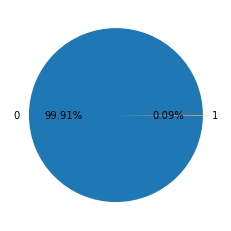

In [16]:
fraud_count = df['isFraud'].value_counts()
plt.pie(fraud_count,labels=fraud_count.keys(),autopct='%.2f%%');

<p>
    Data set is very imbalanced.
    Only .09% are labelled as 1 (fraud), and 99.91% is 0 (not fraud).
</p>

In [17]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [18]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [19]:
over_sample = SMOTE(random_state=0)

In [20]:
df  

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,720172,170136.00,160296.36,1588844,0.00,0.00,0,0
1,1,3,1864.28,2079986,21249.00,19384.72,1656168,0.00,0.00,0,0
4,1,3,11668.14,3274120,41554.00,29885.86,808850,0.00,0.00,0,0
5,1,3,7817.71,5725755,53860.00,46042.29,2136725,0.00,0.00,0,0
6,1,3,7107.77,1716127,183195.00,176087.23,1964517,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,1,63416.99,6020384,63416.99,0.00,194652,276433.18,339850.17,1,0
6362614,743,4,339682.13,3165987,339682.13,0.00,250018,0.00,0.00,1,0
6362615,743,1,339682.13,5369826,339682.13,0.00,502511,0.00,339682.13,1,0
6362618,743,4,850002.52,2140707,850002.52,0.00,317538,0.00,0.00,1,0


In [21]:
x,y = over_sample.fit_resample(x,y)

In [22]:
y.value_counts()

0    6039318
1    6039318
Name: isFraud, dtype: int64

In [23]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

<p style:>Splitting data into training and testing in 80:20 split/p>

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

<H2>Training and Testing Data</H2>

In [25]:
model=MLPClassifier()
model.fit(x_train,y_train)
expected_y=y_test
predicted_y=model.predict(x_test)


<h2>Q. Describe your fraud detection model in elaboration. </h2>
<p>
    I had a range of options for model selection, classifiers such as Random Forest, Decision Tree, and MLP Classifier. However, the Decision Tree classifier yielded unsatisfactory results characterized by low precision and recall scores, indicating that its performance was less than optimal.

In response to these challenges, I opted to explore alternative strategies. This led me to consider  MLP Classifier models. Following thorough research papers and various articles I went for MLP Classifier because of low training time and high recall value, in general, as data is vastly right skewed.

</p>

<h3 style="color: orange"> &gt;&gt; &nbsp; Performance of the Model </h3>

In [26]:
print(classification_report(expected_y,predicted_y))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1207846
           1       0.99      0.99      0.99   1207882

    accuracy                           0.99   2415728
   macro avg       0.99      0.99      0.99   2415728
weighted avg       0.99      0.99      0.99   2415728



In [27]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(expected_y, predicted_y)

# Print the accuracy score
print("Accuracy:", round(accuracy*100,2),"%")

Accuracy: 99.09 %


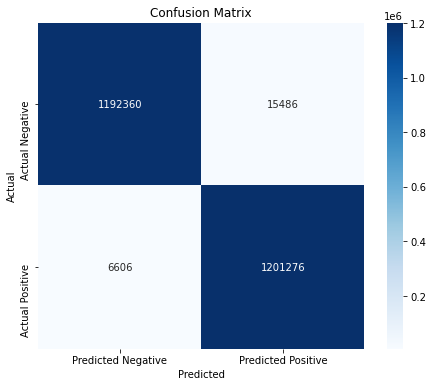

In [28]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(expected_y, predicted_y)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

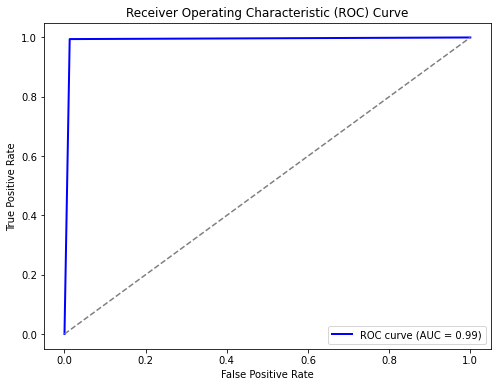

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(expected_y, predicted_y)
auc_score = roc_auc_score(expected_y, predicted_y)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


The area under the receiver operatizing characteristics curve (AUROC) is a widely employed metric for evaluating the performance of classification models.
The model achieved the score of 0.99, making it the top-performing algorithm.

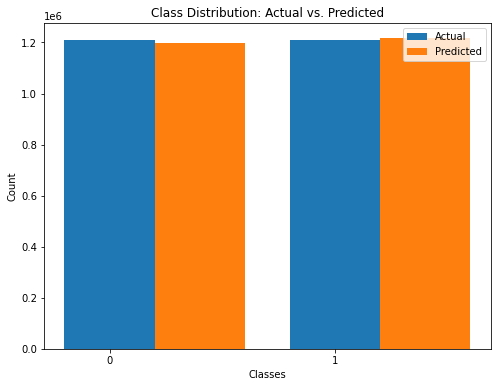

In [30]:
unique_classes = list(set(expected_y))
actual_counts = [list(expected_y).count(cls) for cls in unique_classes]
predicted_counts = [list(predicted_y).count(cls) for cls in unique_classes]

plt.figure(figsize=(8, 6))
plt.bar(unique_classes, actual_counts, width=0.4, align='center', label='Actual')
plt.bar([cls + 0.4 for cls in unique_classes], predicted_counts, width=0.4, align='center', label='Predicted')
plt.xticks(range(len(unique_classes)), labels=unique_classes)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution: Actual vs. Predicted')
plt.legend()
plt.show()

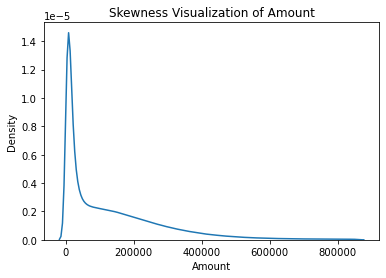

In [31]:
amount_data = df['amount']
sns.kdeplot(amount_data)

plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Skewness Visualization of Amount')
plt.show()

The model is trained on vastly right skewed data might exhibit bias towards the small amounts. This can lead to poor predictive performance for the large amounts and result in lower recall.